In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#setting grid parameters
GRID_SIZE = 100
OBSTACLE_DENSITY = 0.2  #20% of the cells will be obstacles
DISCOUNT_FACTOR = 0.9
REWARD_GOAL = 10
REWARD_STEP = -0.1
REWARD_OBSTACLE = -5
EPSILON = 0.1  #epsilon-greedy policy

In [3]:
#actions
ACTIONS = ['up', 'down', 'left', 'right']
ACTION_MAP = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

In [4]:
#initialising grid with obstacles
def create_grid():
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    obstacles = np.random.choice([0, 1], size=(GRID_SIZE, GRID_SIZE), p=[1-OBSTACLE_DENSITY, OBSTACLE_DENSITY])
    grid[obstacles == 1] = REWARD_OBSTACLE
    start = (0, 0)
    goal = (GRID_SIZE - 1, GRID_SIZE - 1)
    grid[start] = 0
    grid[goal] = REWARD_GOAL
    return grid, start, goal

grid, start, goal = create_grid()

In [5]:
#helper function to get next state and reward
def get_next_state_reward(state, action):
    delta = ACTION_MAP[action]
    next_state = (state[0] + delta[0], state[1] + delta[1])

    if next_state[0] < 0 or next_state[0] >= GRID_SIZE or next_state[1] < 0 or next_state[1] >= GRID_SIZE:
        return state, REWARD_STEP #out of bound

    if grid[next_state] == REWARD_OBSTACLE:
        return state, REWARD_OBSTACLE

    reward = REWARD_GOAL if next_state == goal else REWARD_STEP
    return next_state, reward

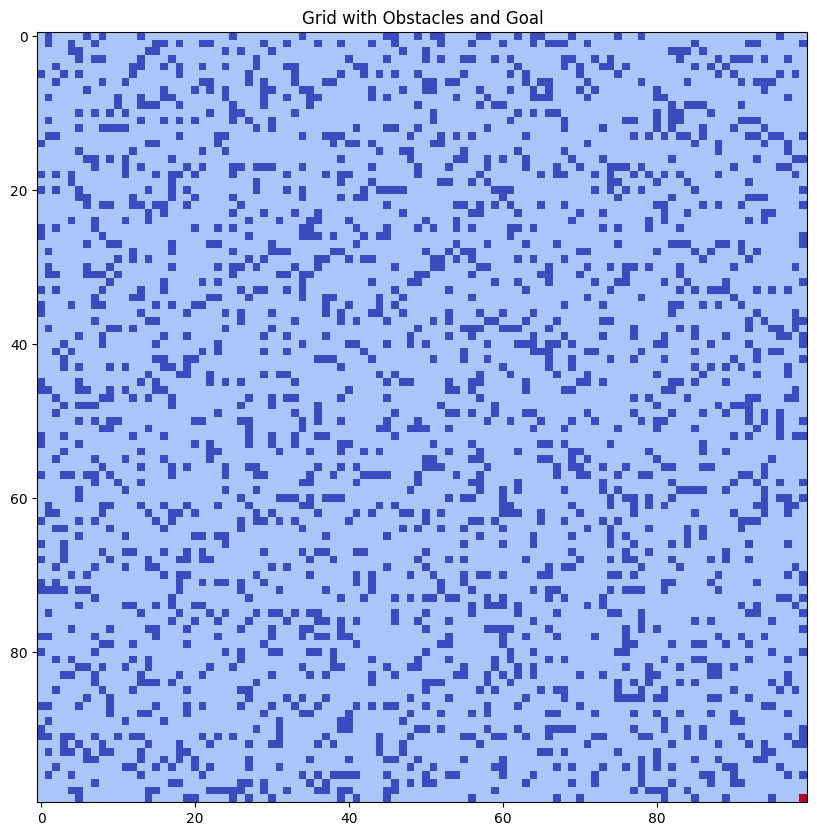

In [6]:
def visualize_grid(grid, policy=None):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(grid, cmap='coolwarm', origin='upper')
    if policy:
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                if (i, j) in policy:
                    ax.text(j, i, policy[(i, j)], ha='center', va='center', color='black')
    plt.title("Grid with Obstacles and Goal")
    plt.show()

visualize_grid(grid)

Dynamic Programming - Value Iteration Method:

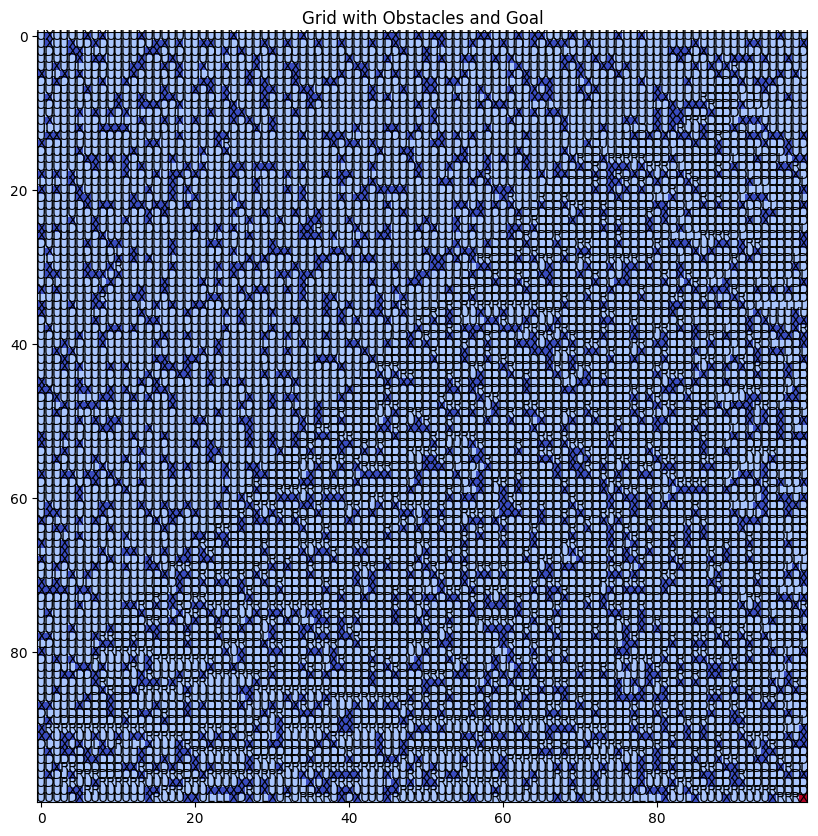

In [7]:
def value_iteration(grid, gamma=DISCOUNT_FACTOR, theta=1e-4):
    values = np.zeros((GRID_SIZE, GRID_SIZE))
    policy = {}

    while True:
        delta = 0
        new_values = np.copy(values)
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                if (i, j) == goal or grid[i, j] == REWARD_OBSTACLE:
                    continue
                value_s = []
                for action in ACTIONS:
                    next_state, reward = get_next_state_reward((i, j), action)
                    value_s.append(reward + gamma * values[next_state])
                best_action_value = max(value_s)
                new_values[i, j] = best_action_value
                delta = max(delta, abs(best_action_value - values[i, j]))
        values = new_values
        if delta < theta:
            break

    #policy
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if (i, j) == goal or grid[i, j] == REWARD_OBSTACLE:
                policy[(i, j)] = "X"
                continue
            action_values = {}
            for action in ACTIONS:
                next_state, reward = get_next_state_reward((i, j), action)
                action_values[action] = reward + gamma * values[next_state]
            best_action = max(action_values, key=action_values.get)
            policy[(i, j)] = best_action[0].upper()  # Just take the first letter for simplicity
    return policy, values

policy, values = value_iteration(grid)
visualize_grid(grid, policy)

Q-Learning Method:

Steps taken to reach the goal (last episode):
(0, 0)
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(4, 1)
(5, 1)
(6, 1)
(7, 1)
(7, 2)
(8, 2)
(9, 2)
(10, 2)
(11, 2)
(11, 3)
(10, 3)
(11, 3)
(12, 3)
(13, 3)
(14, 3)
(15, 3)
(16, 3)
(17, 3)
(18, 3)
(19, 3)
(20, 3)
(20, 4)
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(5, 8)
(5, 9)
(6, 9)
(7, 9)
(7, 10)
(7, 11)
(8, 11)
(9, 11)
(9, 12)
(10, 12)
(10, 13)
(10, 14)
(10, 15)
(10, 16)
(10, 17)
(10, 18)
(10, 19)
(11, 19)
(12, 19)
(13, 19)
(14, 19)
(13, 19)
(13, 20)
(13, 21)
(13, 22)
(14, 22)
(15, 22)
(15, 23)
(16, 23)
(16, 24)
(17, 24)
(18, 24)
(19, 24)
(19, 25)
(19, 26)
(20, 26)
(21, 26)
(21, 27)
(22, 27)
(23, 27)
(23, 28)
(24, 28)
(25, 28)
(25, 29)
(26, 29)
(26, 30)
(0, 0)
(1, 0)
(2, 0)
(2, 1)
(2, 2)
(1, 2)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(1, 5)
(1, 6)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(3, 11)
(2, 11)
(2, 12)
(1, 12)
(1, 13)
(1, 14)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0,

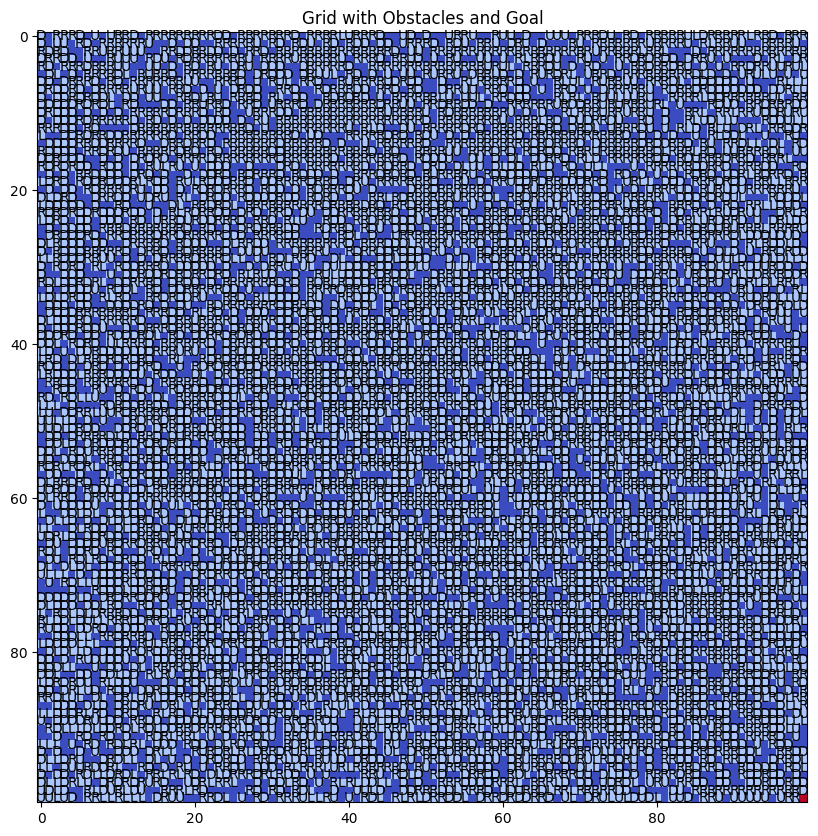

In [8]:
def q_learning(grid, start, goal, episodes=1000, alpha=0.1, gamma=DISCOUNT_FACTOR, epsilon=EPSILON):
    q_values = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))
    steps_taken = []

    for _ in range(episodes):
        state = start
        path = []  #tracking path taken
        while state != goal:
            action_idx = (np.argmax(q_values[state]) if random.uniform(0, 1) > epsilon else random.randint(0, len(ACTIONS) - 1))
            action = ACTIONS[action_idx]
            next_state, reward = get_next_state_reward(state, action)
            path.append(state)  #appending current path to state
            best_next_action = np.argmax(q_values[next_state])
            td_target = reward + gamma * q_values[next_state][best_next_action]
            td_error = td_target - q_values[state][action_idx]
            q_values[state][action_idx] += alpha * td_error
            state = next_state if next_state != state else start  #reset on obstacle or boundary hit

        path.append(goal) #appending goal to state
        steps_taken.append(path)

    #policy
    policy = {(i, j): ACTIONS[np.argmax(q_values[i, j])][0].upper() for i in range(GRID_SIZE) for j in range(GRID_SIZE) if (i, j) != goal and grid[i, j] != REWARD_OBSTACLE}

    #steps taken in the last episode
    print("Steps taken to reach the goal (last episode):")
    for step in steps_taken[-1]:
        print(step)

    return policy, q_values

policy_q, _ = q_learning(grid, start, goal)
visualize_grid(grid, policy_q)